Name: Aditya Saripalli  
Roll No: 20173071  

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data sets
def get_data_sets():
    # class labels C1="+1" C2="-1" appended in the last columns
    data_set_1 = [[ 3,  3,  1],
                  [ 3,  0,  1],
                  [ 2,  1,  1],
                  [ 0,  2,  1],
                  [-1,  1, -1],
                  [ 0,  0, -1],
                  [-1, -1, -1],
                  [ 1,  0, -1]]

    data_set_2 = [[ 3,  3,   1],
                  [ 3,  0,   1],
                  [ 2,  1,   1],
                  [ 0,  1.5, 1],
                  [-1,  1,  -1],
                  [ 0,  0,  -1],
                  [-1, -1,  -1],
                  [ 1,  0,  -1]]
    
    return np.array(data_set_1), np.array(data_set_2)

In [3]:
# Plot the data sets
def plot_data_set_1(slope1,
                    intercept1,
                    slope2,
                    intercept2):
    #given data set 1
    c1_x1 = [3,3,2,0]
    c1_x2 = [3,0,1,2]
    c2_x1 = [-1,0,-1,1]
    c2_x2 = [1,0,-1,0]
    
    plt.title("Data Set 1")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(c1_x1, c1_x2, "o", label="C1")
    plt.plot(c2_x1, c2_x2, "o", label="C2")
    
    #plotting LSE Classifier
    x1 = np.linspace(-2, 4, 20)
    y1 = slope1*x1 + intercept1
    plt.plot(x1, y1, label="LSE")
    
    #plotting LDA Classifier
    x2 = np.linspace(-2, 4, 20)
    y2 = slope2*x2 + intercept2
    plt.plot(x2, y2, label="LDA")

    plt.legend(loc=8)
    plt.show()

In [4]:
# Plot the data sets
def plot_data_set_2(slope1,
                    intercept1,
                    slope2,
                    intercept2):
    #given data set 2
    c1_x1 = [3,3,2,0]
    c1_x2 = [3,0,1,1.5]
    c2_x1 = [-1,0,-1,1]
    c2_x2 = [1,0,-1,0]

    plt.title("Data Set 2")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(c1_x1, c1_x2, "o", label="C1")
    plt.plot(c2_x1, c2_x2, "o", label="C2")

    #plotting LSE Classifier
    x1 = np.linspace(-2, 4, 20)
    y1 = slope1*x1 + intercept1
    plt.plot(x1, y1, label="LSE")
    
    #plotting Fisher's LDA Classifier
    x2 = np.linspace(-2, 4, 20)
    y2 = slope2*x2 + intercept2
    plt.plot(x2, y2, label="LDA")
    
    plt.legend(loc=8)
    plt.show()

In [5]:
# Traing Least Square Error weights
def train_lse_weights(data_set, weights, learning_rate):
    
    # separating features and class labels
    data_set_features = np.array(data_set[:,:-1])
    data_set_labels   = np.array(data_set[:,[-1]])

    # get the dimensions of the data set
    n_datasets, n_features = data_set_features.shape
    # assume a learning rate of 1.0
    #learning_rate = 0.02

    for i in range(n_datasets):
        x_i = data_set_features[i]
        y_i = data_set_labels[i]
        w_dot_x = np.dot(weights, x_i)
        
        # calculate the product y*f(x) -> y_t(w_t.x_t) for misclassification
        if (y_i * w_dot_x) <= 0:
            weights += learning_rate * (y_i - w_dot_x) * x_i

    return weights

In [6]:
# Compute linear classifier using "Least Square Error" approach
def compute_lse_classifier(data_set, num_epochs, learning_rate):

    # adding the bias multipliers in data set
    n_datasets = data_set.shape[0]
    bias_vector = np.ones(n_datasets).reshape(n_datasets,1)
    data_set = np.hstack((bias_vector, data_set))

    # initialize the weight vector
    weights = np.zeros(data_set.shape[1] - 1)

    for epoch in range(num_epochs):
        weights = train_lse_weights(data_set, weights, learning_rate)

    # computing m and b for the linear classifier y = mx + b
    # where m=(-w_1/w_2) and b=(-w_0/w_2)
    b = -weights[0]/weights[2]
    m = -weights[1]/weights[2]

    return m, b

In [7]:
# Compute linear classifier using "Fisher's LDA" approach
def compute_lda_classifier(data_set,
                           class_labels,
                           num_epochs,
                           learning_rate):

    n_features = data_set.shape[1] - 1
    S_W = np.zeros((n_features,n_features))
    S_B = np.zeros((n_features,n_features))
    data_set_features = {}
    mean_vectors = {}

    #1.compute the mean column vectors
    for label in class_labels:
        #extract the chunk of features from the data set related to a class
        #create a dictionary of key=class_label value=class_data_set
        data_set_features[label] = np.array([row[:-1]
                                   for row in data_set if row[-1]==label])
        #create a dictionary of mean column vectors
        #axis=0 is mean computed vertically in the data set
        mean_vector = np.mean(data_set_features[label], axis=0)
        mean_vectors[label] = mean_vector.reshape(n_features,1)

    #2.computing the within class scatter matrix : S_W
    for label in class_labels:
        S_i = np.zeros((n_features,n_features))
        for x in data_set_features[label]:
            #making column vectors for features and mean
            x  = x.reshape(n_features,1)
            m = mean_vectors[label].reshape(n_features,1)
            #computing scatter matrix of current class
            S_i += (x - m).dot((x - m).T)
        S_W += S_i
    
    #3.computing between class scatter matrix
    m1 = mean_vectors[class_labels[0]].reshape(n_features,1)
    m2 = mean_vectors[class_labels[1]].reshape(n_features,1)
    S_B = (m1-m2).dot((m1-m2).T)
    
    #4.computng eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

    #5.sorting eigen vectors in decreasing order of eigen values
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i])
                   for i in range(len(eigen_values))]
    eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

    #6.projecting data onto the eigen vector(w) corresponding to largest eigen value
    w = eigen_pairs[0][1]
    projected_data = np.array([])
    for row in data_set:
        x = row[:-1]
        x = (np.dot(x,w) / np.dot(w,w)) * w
        x = np.append(x, row[-1])
        projected_data = x if projected_data.size == 0 \
                           else np.vstack((projected_data, x))

    #7.running perceptron algorithm on the projected data to find the linear classifier
    slope, intercept = compute_lse_classifier(projected_data,
                                              num_epochs,
                                              learning_rate)

    #8.return slope and intercept of the linear classifier
    return slope, intercept

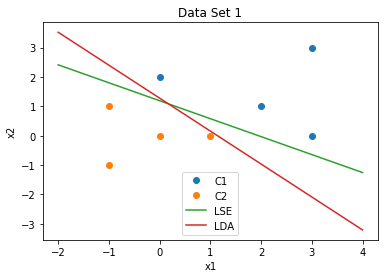

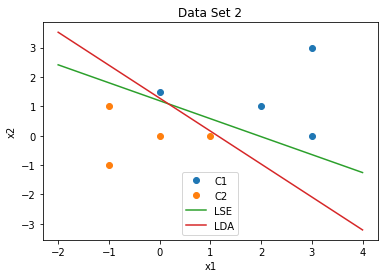

In [8]:
##################################################################
# Least Squares Approach & Fisher's Linear Discriminant Analysis #
##################################################################

# class labels C1="+1" C2="-1"
class_labels = [1,-1]
data_set_1, data_set_2 = get_data_sets()

for index, data_set in enumerate(get_data_sets()):
    #Least Square Error Approach
    slope1, intercept1 = compute_lse_classifier(data_set_1,
                                                num_epochs=10,
                                                learning_rate=1.0)
    #Fisher's LDA Approach
    slope2, intercept2 = compute_lda_classifier(data_set_1,
                                                class_labels,
                                                num_epochs=10,
                                                learning_rate=0.05)
    if index == 0:
        plot_data_set_1(slope1,
                        intercept1,
                        slope2,
                        intercept2)
    else:
        plot_data_set_2(slope1,
                        intercept1,
                        slope2,
                        intercept2)

Observations:
=============
C1 -> Class 1  
C2 -> Class 2  
LSE -> Least Square Approach  
LDA -> Fisher's Linear Discriminant  


Least square approach gives a linear classifier for a learning rate of 1.0, whereas Fisher's LDA needs a smaller learning rate of 0.05 to produce a better linear classifier - for both the data sets.   